# Connecting

In [5]:
# 如果出現了長條型的可輸入單元格 代表你曾經 授權過了 可以直接跳到下一格
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [1]:
"""
from google.colab import drive
import os
drive.mount('/content/gdrive', force_remount=True)
"""

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144467 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.22-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.22-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.22-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········

In [0]:
# 指定Google Drive雲端硬盤的根目錄，名為drive
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
import os
os.chdir("My Drive")
if("Colab Notebooks" in os.listdir()):
  os.chdir("Colab Notebooks")
else:
  os.mkdir("Colab Notebooks")
  os.chdir("Colab Notebooks")

# Loading packages

In [7]:
# 資料處理套件
import cv2
import csv
import random
import time
import numpy as np
import pandas as pd
import matplotlib.image as mpimg # mpimg 用於讀取圖片
import matplotlib.pyplot as plt # plt 用於顯示圖片
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# 設定顯示中文字體
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 

In [10]:
# Keras深度學習模組套件
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras import utils as np_utils
from keras import backend as K
from keras import optimizers

Using TensorFlow backend.


In [0]:
# tensorflow深度學習模組套件
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

In [12]:
# 查看通道位置
print(K.image_data_format())
!ls

channels_last
100x100images.pickle  100x100labels.pickle  AIMango  drive  files  proj.ipynb


# Loading images

In [0]:
# 讀取資料集標籤檔
Label = pd.read_csv("files/train.csv",encoding="utf8")

In [0]:
# 顯示資料集標籤檔
Label.head()

,image_id,label
0,00002.jpg,C
1,00003.jpg,C
2,00004.jpg,B
3,00005.jpg,A
4,00007.jpg,A


In [0]:
# 串接圖片檔的路徑
Sample_pics_path = os.path.join("files/C1-P1_Train")

In [0]:
# 讀取路徑中的圖片
train_mango_fnames = os.listdir(Sample_pics_path)

In [0]:
# 檢視是否有讀取到圖片
print(train_mango_fnames[0])
print(train_mango_fnames[1])
print(train_mango_fnames[2])

00580.jpg
02142.jpg
03181.jpg


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


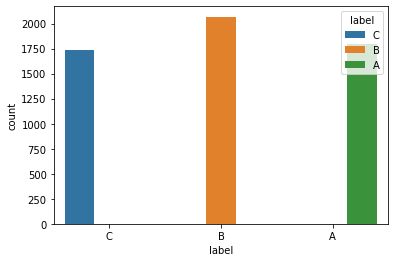

In [0]:
sns.countplot(Label['label'], hue = Label["label"])

In [0]:
sector = Label.groupby('label')
sector.size()

label
A    1792
B    2068
C    1740
dtype: int64

# Test for loading image

In [0]:
# 讀取圖檔
img = cv2.imread("files/C1-P1_Train/00539.jpg")
# 查看資料型態
type(img)

numpy.ndarray

In [0]:
# 顯示圖片的比例
img.shape

(816, 1088, 3)

In [0]:
# 把圖片的比例壓縮
res = cv2.resize(img,(100,100),interpolation=cv2.INTER_LINEAR)

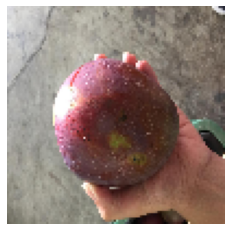

In [0]:
# 顯示壓縮過原圖的芒果照片
plt.imshow(res[:,:,::-1])
plt.axis('off')
plt.show()

# Data preprocessing

In [0]:
label = np.array(Label)
print(len(label))
print(label[np.random.randint(1,5600)])

5600
['02127.jpg' 'A']


In [0]:
'''
np.random.shuffle(label)
label
'''

array([['05029.jpg', 'C'],
       ['05432.jpg', 'C'],
       ['04318.jpg', 'A'],
       ...,
       ['00549.jpg', 'C'],
       ['07899.jpg', 'A'],
       ['04869.jpg', 'A']], dtype=object)

In [0]:
X=[]
y=[]

for i in range(len(label)):
    img = cv2.imread("files/C1-P1_Train/" + label[i][0] )
    res = cv2.resize(img,(100,100),interpolation=cv2.INTER_LINEAR)
    res = img_to_array(res)
    if i%50 == 0:
      print(i)
    X.append(res)    
    y.append(label[i][1])
print("Done!")

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250
5300
5350
5400
5450
5500
5550
Done!


In [0]:
X[0]

array([[[ 38., 195., 221.],
        [ 32., 191., 219.],
        [ 38., 189., 213.],
        ...,
        [  4.,  11.,  26.],
        [  2.,   3.,   7.],
        [  1.,   2.,   2.]],

       [[ 34., 193., 219.],
        [ 32., 186., 215.],
        [ 28., 182., 211.],
        ...,
        [  0.,   2.,  13.],
        [  0.,   2.,   2.],
        [  2.,   4.,   4.]],

       [[ 35., 194., 220.],
        [ 34., 187., 216.],
        [ 30., 183., 210.],
        ...,
        [  0.,   3.,   1.],
        [  0.,   2.,   0.],
        [  0.,   2.,   0.]],

       ...,

       [[  1., 186., 224.],
        [  4., 189., 225.],
        [  3., 177., 213.],
        ...,
        [ 76.,  73.,  95.],
        [ 74.,  68.,  91.],
        [ 81.,  75.,  98.]],

       [[  1., 186., 224.],
        [  0., 194., 231.],
        [  4., 185., 223.],
        ...,
        [ 77.,  75.,  97.],
        [ 79.,  75., 100.],
        [ 71.,  67.,  92.]],

       [[  0., 180., 219.],
        [  5., 192., 230.],
        [  4., 1

In [0]:
import pickle

with open('./100x100images.pickle','wb') as p:
    pickle.dump(X, p)

with open('./100x100labels.pickle','wb') as p:
    pickle.dump(y, p)

In [0]:
import pickle

with open('./100x100images.pickle', 'rb') as f:
     X = pickle.load(f)

with open('./100x100labels.pickle', 'rb') as f:
     y = pickle.load(f)

In [15]:
#print(img.shape)
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

(5600, 100, 100, 3)
(5600,)


In [0]:
X = X.astype("float32")

In [0]:
y = np.where(y == 'A', '0', y)
y = np.where(y == 'B', '1', y)
y = np.where(y == "C", '2', y)

In [18]:
y

array(['2', '2', '1', ..., '0', '0', '1'], dtype='<U1')

In [19]:
y = tf.strings.to_number(y, out_type=tf.float32)
print(y)
print(type(y[0]))

tf.Tensor([2. 2. 1. ... 0. 0. 1.], shape=(5600,), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [0]:
y = np_utils.to_categorical(y, num_classes = 3)

In [21]:
print(y.shape)
print(y[0:20])

(5600, 3)
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


# Training test split

In [22]:
# 分配訓練集及測試集比例
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

y_test

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [23]:
print(type(x_train))
print(len(x_train))
print(x_train.shape)
print(type(x_train[0]))

<class 'numpy.ndarray'>
4480
(4480, 100, 100, 3)
<class 'numpy.ndarray'>


# Model building

In [0]:
from keras import regularizers

In [0]:
image_size = 100

In [143]:
# 建立深度學習CNN Model

model = tf.keras.Sequential()

model.add(layers.Conv2D(32,(3,3),
                 strides=(1,1),
                 input_shape=(image_size, image_size, 3),
                 padding='same',
                 activation='relu'
#                 ,kernel_regularizer=regularizers.l2(0.01)
                 ))


model.add(layers.Conv2D(32,(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu'
#                 ,kernel_regularizer=regularizers.l2(0.01)
                 ))

model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D(pool_size=(2,2),strides=None))

model.add(layers.Conv2D(64,(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu'
#                 ,kernel_regularizer=regularizers.l2(0.01)
                 ))

model.add(layers.Conv2D(64,(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu'
#                 ,kernel_regularizer=regularizers.l2(0.01)
                 ))

model.add(layers.MaxPooling2D(pool_size=(2,2),strides=None))

model.add(layers.Conv2D(128,(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu',
                 ))

model.add(layers.Conv2D(128,(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu',
                 ))

model.add(layers.MaxPooling2D(pool_size=(2,2),strides=None))

model.add(layers.Conv2D(256,(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu',
                 ))

model.add(layers.Conv2D(256,(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu',
                 ))


model.add(layers.Dropout(0.2))

model.add(layers.MaxPooling2D(pool_size=(2,2),strides=None))

model.add(layers.Flatten())

model.add(layers.Dense(128,activation='relu'))

model.add(layers.Dense(256,activation='relu'))

model.add(layers.Dropout(0.2))

model.add(layers.Dense(512,activation='relu'))

model.add(layers.Dropout(0.2))

model.add(layers.Dense(3,activation='softmax'))

model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_180 (Conv2D)          (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_181 (Conv2D)          (None, 100, 100, 32)      9248      
_________________________________________________________________
batch_normalization_29 (Batc (None, 100, 100, 32)      128       
_________________________________________________________________
max_pooling2d_110 (MaxPoolin (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_182 (Conv2D)          (None, 50, 50, 64)        18496     
_________________________________________________________________
conv2d_183 (Conv2D)          (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_111 (MaxPoolin (None, 25, 25, 64)      

In [0]:
adam = optimizers.adam(lr=0.01)
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['acc'])

In [0]:
# zca_whitening 對輸入數據施加ZCA白化
# rotation_range 數據提升時圖片隨機轉動的角度
# width_shift_range 圖片寬度的某個比例，數據提升時圖片水平偏移的幅度
# shear_range 剪切強度（逆時針方向的剪切變換角度）
# zoom_range 隨機縮放的幅度
# horizontal_flip 進行隨機水平翻轉
# fill_mode ‘constant’，‘nearest’，‘reflect’或‘wrap’之一，當進行變換時超出邊界的點將根據本參數給定的方法進行處理

datagen = ImageDataGenerator(
    zca_whitening=False,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


datagen.fit(x_train)

In [28]:
# 導入圖像增強參數
x_train = x_train/255
x_test = x_test/255
print('rescale！done!')

rescale！done!


In [0]:
# 設定超參數HyperParameters 
batch_size =  16
epochs = 50

In [0]:
# 檔名設定
file_name = str(epochs)+'_'+str(batch_size)

# 加入EarlyStopping以及Tensorboard等回調函數
CB = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
TB = keras.callbacks.TensorBoard(log_dir='./log'+"_"+file_name, histogram_freq=1)

In [31]:
x_train.shape

(4480, 100, 100, 3)

In [0]:
#使用datagen的版本
'''
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32,
                    epochs=epochs)
'''

In [145]:
history = model.fit(
    x = x_train , y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split = 0.2
    ,callbacks = [CB]
)

Epoch 1/50
224/224 [==============================] - 4s 16ms/step - loss: 1.0998 - acc: 0.3591 - val_loss: 1.0944 - val_acc: 0.3772
Epoch 2/50
224/224 [==============================] - 3s 15ms/step - loss: 1.0622 - acc: 0.4255 - val_loss: 1.0517 - val_acc: 0.4062
Epoch 3/50
224/224 [==============================] - 3s 15ms/step - loss: 0.9919 - acc: 0.4947 - val_loss: 0.9600 - val_acc: 0.4978
Epoch 4/50
224/224 [==============================] - 3s 15ms/step - loss: 0.9488 - acc: 0.5215 - val_loss: 0.9834 - val_acc: 0.4799
Epoch 5/50
224/224 [==============================] - 3s 15ms/step - loss: 0.8566 - acc: 0.5985 - val_loss: 0.7902 - val_acc: 0.6172
Epoch 6/50
224/224 [==============================] - 3s 15ms/step - loss: 0.7292 - acc: 0.6716 - val_loss: 0.7116 - val_acc: 0.6797
Epoch 7/50
224/224 [==============================] - 3s 15ms/step - loss: 0.6571 - acc: 0.7115 - val_loss: 0.7298 - val_acc: 0.6596
Epoch 8/50
224/224 [==============================] - 3s 15ms/step - 

In [146]:
model.evaluate(x_test, y_test, batch_size=64)

18/18 [==============================] - 0s 15ms/step - loss: 0.6411 - acc: 0.7188


[0.6411421298980713, 0.71875]

In [0]:
sns.set()
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(-0.2,1.5)
    plt.show()

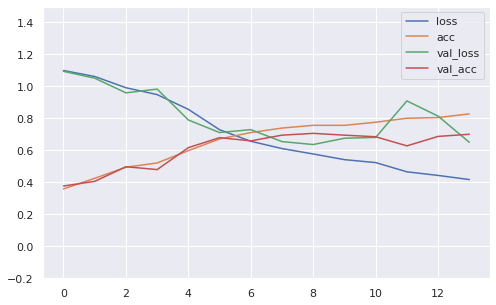

In [151]:
plot_learning_curves(history)

In [152]:
84*800*800*3 - 5600*80*80*3
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]